<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-karelcuevas/blob/main/Equipo65_reto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Maestría en Inteligencia Artificial Aplicada**
CIENCIA Y ANALÍTICA DE DATOS

Reto-> Entrega 2 (18/11) -> Arboles



**Nombres y matrículas de los integrantes del equipo:**

* Héctor Manuel González Villarreal-A00178679
*   Karel Alejandro Cuevas Hernández-A00301492




En cada sección deberás incluir todas las líneas de código necesarias para responder a cada uno de los ejercicios.

In [1]:
# Cargamos los datos del archivo previamente guardado en el ambiente Colab local en la carpeta /content/

import pandas as pd

URL1 = '/content/Datos_de_calidad_del_agua_de_sitios_de_monitoreo_de_aguas_subterraneas_2020.csv'
df = pd.read_csv(URL1, sep=',', encoding = 'latin1')
df_aguasub = df.copy()
df_aguasub

,CLAVE,SITIO,ORGANISMO_DE_CUENCA,ESTADO,MUNICIPIO,ACUIFERO,SUBTIPO,LONGITUD,LATITUD,PERIODO,...,CUMPLE_CON_DUR,CUMPLE_CON_CF,CUMPLE_CON_NO3,CUMPLE_CON_AS,CUMPLE_CON_CD,CUMPLE_CON_CR,CUMPLE_CON_HG,CUMPLE_CON_PB,CUMPLE_CON_MN,CUMPLE_CON_FE
0,DLAGU6,POZO SAN GIL,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,ASIENTOS,VALLE DE CHICALOTE,POZO,-102.02210,22.20887,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
1,DLAGU6516,POZO R013 CAÑADA HONDA,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,AGUASCALIENTES,VALLE DE CHICALOTE,POZO,-102.20075,21.99958,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
2,DLAGU7,POZO COSIO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,COSIO,VALLE DE AGUASCALIENTES,POZO,-102.28801,22.36685,2020,...,SI,SI,SI,NO,SI,SI,SI,SI,SI,SI
3,DLAGU9,POZO EL SALITRILLO,LERMA SANTIAGO PACIFICO,AGUASCALIENTES,RINCON DE ROMOS,VALLE DE AGUASCALIENTES,POZO,-102.29449,22.18435,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI
4,DLBAJ107,RANCHO EL TECOLOTE,PENINSULA DE BAJA CALIFORNIA,BAJA CALIFORNIA SUR,LA PAZ,TODOS SANTOS,POZO,-110.24480,23.45138,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1063,OCRBR5101M1,L-310 (COMUNIDAD SAN MANUEL),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.54191,24.76036,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1064,OCRBR5102M1,L-305 (EJIDO OJO DE AGUA LAS CRUCESITAS),RIO BRAVO,NUEVO LEON,LINARES,CITRICOLA SUR,POZO,-99.70099,24.78280,2020,...,SI,SI,NO,SI,SI,SI,SI,SI,SI,SI
1065,OCRBR5105M2,HACIENDA MEXIQUITO POZO 01,RIO BRAVO,NUEVO LEON,CADEREYTA JIMENEZ,CITRICOLA NORTE,POZO,-99.82249,25.55197,2020,...,NO,SI,NO,SI,SI,SI,SI,SI,SI,SI
1066,OCRBR5106M1,COMUNIDAD LOS POCITOS,RIO BRAVO,NUEVO LEON,GALEANA,NAVIDAD-POTOSI-RAICES,POZO,-100.32683,24.80118,2020,...,SI,SI,SI,SI,SI,SI,SI,SI,SI,SI


In [3]:
# Cargamos el diccionario de datos previamente guardado en el ambiente Colab local en la carpeta /content/
# Nos damos cuenta que la columna "SEMAFORO" indica el nivel de contaminación del agua de acuerdo a los contaminantes, por lo tanto la tomaremos como referencia en lo subsecuente 

URL2 = '/content/Diccionario_datos_Subterrenal.csv'
df2 = pd.read_csv(URL2, sep=',', encoding = 'latin1')
df2

,ï»¿CAMPO,DESCRIPCION,TIPO,VALOR_POSIBLE
0,CLAVE,Clave del sitio de monitoreo,Texto,A - Z
1,SITIO,Nombre del sitio de muestreo,Texto,A - Z
2,ID_ORGANISMO_DE_CUENCA,Identificador de Organismo de Cuenca,Numerico,Entero
3,NOMBRE_ORGANISMO_DE_CUENCA,Nombre del Organismo de Cuenca de agua donde s...,Texto,A - Z
4,ID_ESTADO,Identificador de Estado,Numerico,Entero
...,...,...,...,...
57,CUMPLE_CON_SDT_ra,Indica si cumple con la calidad de Excelente p...,Texto,"SI, NO, ND"
58,CUMPLE_CON_SDT_salin,Indica si cumple con la calidad de Potable - D...,Texto,"SI, NO, ND"
59,CONTAMINANTES,Contaminantes presentes en incumplimiento (Co...,Texto,"ALC, CONDUC, SDT_ra,SDT_salin, FLUO, DT, AS,NO..."
60,SEMAFORO,Indica el nivel de contaminacion de acuerdo a ...,Texto,"Verde, Amarillo, Rojo"


In [4]:
#Comenzamos el análisis de datos

df_aguasub.describe()

,LONGITUD,LATITUD,PERIODO,ALC_mg/L,CONDUCT_mS/cm,SDT_mg/L
count,1068.000000,1068.000000,1068.0,1064.000000,1062.000000,0.0
mean,-101.891007,23.163618,2020.0,235.633759,1138.953013,NaN
std,6.703263,3.887670,0.0,116.874291,1245.563674,NaN
min,-116.664250,14.561150,2020.0,26.640000,50.400000,NaN
25%,-105.388865,20.212055,2020.0,164.000000,501.750000,NaN
50%,-102.174180,22.617190,2020.0,215.527500,815.000000,NaN
75%,-98.974716,25.510285,2020.0,292.710000,1322.750000,NaN
max,-86.864120,32.677713,2020.0,1650.000000,18577.000000,NaN


In [5]:
#revisemos datos nulos
df_aguasub.isnull().sum()

CLAVE                      0
SITIO                      0
ORGANISMO_DE_CUENCA        0
ESTADO                     0
MUNICIPIO                  0
ACUIFERO                   0
SUBTIPO                    0
LONGITUD                   0
LATITUD                    0
PERIODO                    0
ALC_mg/L                   4
CALIDAD_ALC                4
CONDUCT_mS/cm              6
CALIDAD_CONDUC             6
SDT_mg/L                1068
SDT_M_mg/L                 2
CALIDAD_SDT_ra             2
CALIDAD_SDT_salin          2
FLUORUROS_mg/L             0
CALIDAD_FLUO               0
DUR_mg/L                   1
CALIDAD_DUR                1
COLI_FEC_NMP/100_mL        0
CALIDAD_COLI_FEC           0
N_NO3_mg/L                 1
CALIDAD_N_NO3              1
AS_TOT_mg/L                0
CALIDAD_AS                 0
CD_TOT_mg/L                0
CALIDAD_CD                 0
CR_TOT_mg/L                0
CALIDAD_CR                 0
HG_TOT_mg/L                0
CALIDAD_HG                 0
PB_TOT_mg/L   

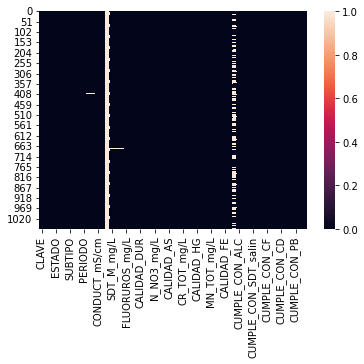

In [6]:
# Identificamos valores faltantes visualmente

import seaborn as sns

sns.heatmap(df_aguasub.isnull(), cbar=True)

In [7]:
df_aguasub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 57 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_mg/L              0 non-null      float64
 15  SDT_M_mg/L           

In [8]:
#La columna SDT_mg/L no trae ningún valor, así que la eliminamos

df_aguasub.drop('SDT_mg/L', axis=1, inplace=True)

In [9]:
# Convertiremos las columnas de contaminantes en numéricos flotantes, estableciendo manualmente los valores
col_contaminantes = ['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']

for name in col_contaminantes:
  df_aguasub[name] = df_aguasub[name].astype('str')
  df_aguasub[name] = df_aguasub[name].str.replace('<25','25') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.2','0.2') 
  df_aguasub[name] = df_aguasub[name].str.replace('<20','20') 
  df_aguasub[name] = df_aguasub[name].str.replace('<1.1','1.1')
  df_aguasub[name] = df_aguasub[name].str.replace('<0.02','0.02') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.01','0.01') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.003','0.003')
  df_aguasub[name] = df_aguasub[name].str.replace('<0.005','0.005') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.0005','0.0005') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.0015','0.0015') 
  df_aguasub[name] = df_aguasub[name].str.replace('<0.025','0.025')  
  df_aguasub[name]= df_aguasub[name].astype('float')

df_aguasub.info()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: The default value of regex will change from True to False in a future version.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: The default value of regex will change from True to False in a future version.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 56 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CLAVE                 1068 non-null   object 
 1   SITIO                 1068 non-null   object 
 2   ORGANISMO_DE_CUENCA   1068 non-null   object 
 3   ESTADO                1068 non-null   object 
 4   MUNICIPIO             1068 non-null   object 
 5   ACUIFERO              1068 non-null   object 
 6   SUBTIPO               1068 non-null   object 
 7   LONGITUD              1068 non-null   float64
 8   LATITUD               1068 non-null   float64
 9   PERIODO               1068 non-null   int64  
 10  ALC_mg/L              1064 non-null   float64
 11  CALIDAD_ALC           1064 non-null   object 
 12  CONDUCT_mS/cm         1062 non-null   float64
 13  CALIDAD_CONDUC        1062 non-null   object 
 14  SDT_M_mg/L            1066 non-null   float64
 15  CALIDAD_SDT_ra       

In [10]:
# Separamos las columnas categóricas que acabamos de limpiar

df_aguasub_cat = df_aguasub[['ALC_mg/L','CONDUCT_mS/cm','SDT_M_mg/L','FLUORUROS_mg/L','DUR_mg/L','COLI_FEC_NMP/100_mL',
                      'N_NO3_mg/L','AS_TOT_mg/L','CD_TOT_mg/L','CR_TOT_mg/L','HG_TOT_mg/L','PB_TOT_mg/L','MN_TOT_mg/L','FE_TOT_mg/L']]

df_aguasub_cat.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB


In [11]:
# Realizamos imputaciones utilizando la media y la mediana

import numpy as np
df_aguasub_imputado = df_aguasub_cat.copy()
df_aguasub_imputado.info()
for name in col_contaminantes:
  mediana = df_aguasub_imputado[name].median() 
  df_aguasub_imputado[name]= df_aguasub_imputado[name].replace(np.nan, mediana)
df_aguasub_imputado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ALC_mg/L             1064 non-null   float64
 1   CONDUCT_mS/cm        1062 non-null   float64
 2   SDT_M_mg/L           1066 non-null   float64
 3   FLUORUROS_mg/L       1068 non-null   float64
 4   DUR_mg/L             1067 non-null   float64
 5   COLI_FEC_NMP/100_mL  1068 non-null   float64
 6   N_NO3_mg/L           1067 non-null   float64
 7   AS_TOT_mg/L          1068 non-null   float64
 8   CD_TOT_mg/L          1068 non-null   float64
 9   CR_TOT_mg/L          1068 non-null   float64
 10  HG_TOT_mg/L          1068 non-null   float64
 11  PB_TOT_mg/L          1068 non-null   float64
 12  MN_TOT_mg/L          1068 non-null   float64
 13  FE_TOT_mg/L          1068 non-null   float64
dtypes: float64(14)
memory usage: 116.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 

In [12]:
##Obtenemos X y Y de los dataframes ya limpios
X = df_aguasub_imputado
Y = pd.DataFrame(df_aguasub['SEMAFORO'])

#Cambiamos las clases a numeros
Y['SEMAFORO'] = Y['SEMAFORO'].replace('Verde',1)
Y['SEMAFORO'] = Y['SEMAFORO'].replace('Rojo',2)
Y['SEMAFORO'] = Y['SEMAFORO'].replace('Amarillo',3)


In [13]:
#Separamos los dataframes para entrenar y probar nuestros modelos
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df_aguasub_imputado, Y, test_size=0.3, random_state=1) 
X_train

,ALC_mg/L,CONDUCT_mS/cm,SDT_M_mg/L,FLUORUROS_mg/L,DUR_mg/L,COLI_FEC_NMP/100_mL,N_NO3_mg/L,AS_TOT_mg/L,CD_TOT_mg/L,CR_TOT_mg/L,HG_TOT_mg/L,PB_TOT_mg/L,MN_TOT_mg/L,FE_TOT_mg/L
479,277.500,8680.0,5418.2,1.7301,1361.0232,201.0,4.066524,0.0100,0.003,0.00500,0.00050,0.0133,0.00230,0.04070
635,213.000,736.0,505.0,0.2000,245.3358,1.1,3.220000,0.0100,0.003,0.02342,0.00120,0.0050,0.00165,0.06361
106,110.595,1931.0,1402.0,0.5081,398.9200,1.1,16.082471,0.0163,0.003,0.00500,0.00050,0.0050,0.00150,0.02500
790,60.775,181.7,151.6,0.6747,45.6366,10.0,0.649018,0.0100,0.003,0.00500,0.00050,0.0050,0.00150,0.02610
23,208.050,1376.0,720.8,0.2572,313.1522,3654.0,7.535822,0.0156,0.003,0.00500,0.00149,0.0050,0.02790,1.47000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,233.155,753.0,586.8,0.4618,265.8828,1.1,6.072245,0.0112,0.003,0.00500,0.00050,0.0050,0.00150,0.04910
715,111.000,221.0,176.6,0.2000,73.7040,1.1,0.020000,0.0100,0.003,0.00500,0.00050,0.0050,0.21200,1.94800
905,178.000,1120.0,1700.0,0.2978,701.7669,9.0,8.863363,0.0100,0.003,0.00500,0.00050,0.0050,0.00150,0.02500
235,357.420,966.0,732.6,5.2268,75.6960,1.1,0.225885,0.0421,0.003,0.00500,0.00050,0.0050,0.00150,0.02500


# Arbol de decision

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
#creamos el arbol con los demas parametros con default
# prbamos cambiado el maxdepth, el ccp alfha y el weight en baalanced y nos da menor exactitud asi que dejamos elos defaults
arbol = DecisionTreeClassifier()
#arbol = DecisionTreeClassifier(ccp_alpha=0.02)
arbol.fit(X_train,Y_train)
nombrefeatures=X.columns
predicciones = arbol.predict(X_test)
# guardamos el score del modelo para compararlo al final
accuracyarbol = accuracy_score(Y_test,predicciones)


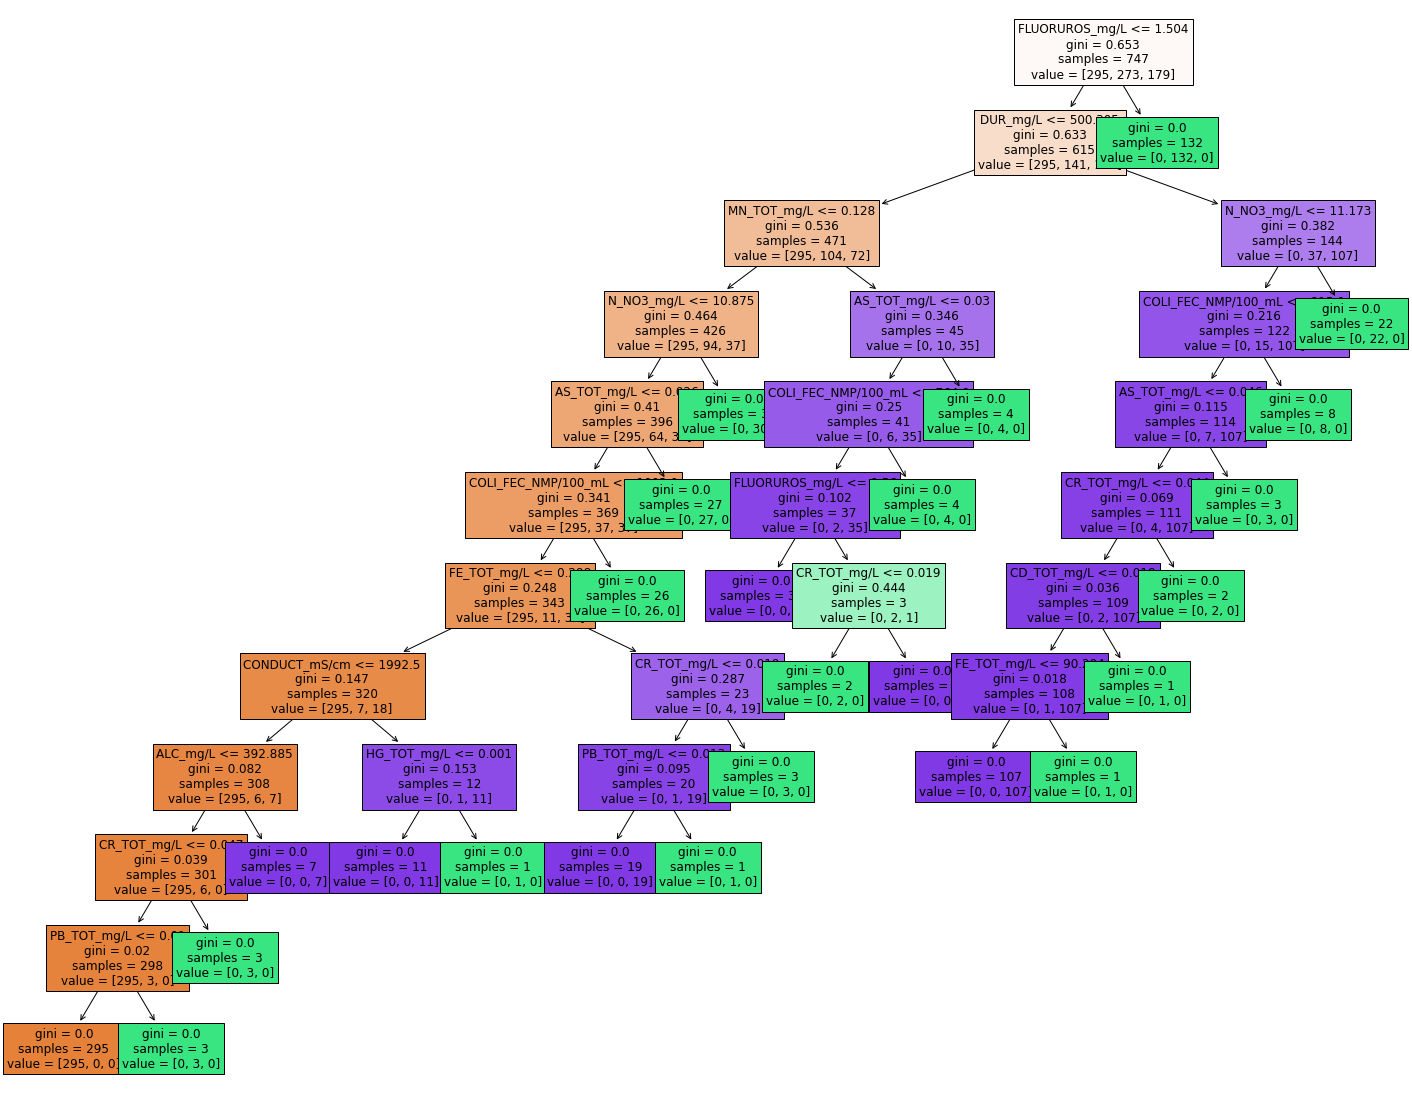

In [17]:
# graficamos el arbol
import matplotlib.pyplot as plt 
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(arbol, feature_names=nombrefeatures, filled=True, fontsize=12)

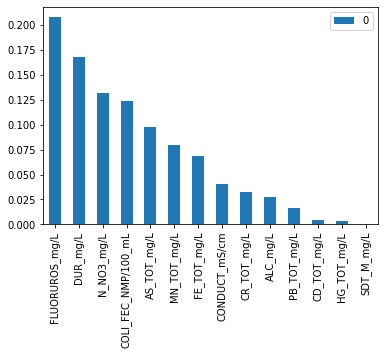

In [18]:
#Obtenemos la importancia de cada feature y lo graficamos
importanciaarbol = pd.DataFrame(arbol.feature_importances_,index=nombrefeatures).sort_values(by=0, ascending=False)
importanciaarbol.plot(kind='bar')
# aunque destaca Floururos tiene solo un 20% de importancia teniendo casi 7 features mas del 80% de valor acumulado

In [19]:
#Obtenemos la matriz de confusion
from sklearn.metrics import confusion_matrix
matrizarbol = confusion_matrix(Y_test,predicciones,labels=[1,2,3])


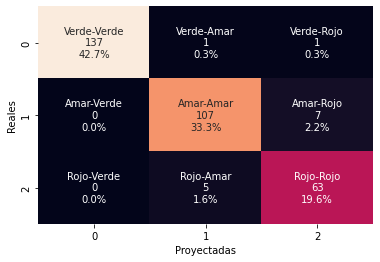

In [20]:
#Graficamos la matriz
import matplotlib.pyplot as plt
txt = ['Verde-Verde','Verde-Amar','Verde-Rojo',
    'Amar-Verde','Amar-Amar','Amar-Rojo',
    'Rojo-Verde','Rojo-Amar','Rojo-Rojo',]
frecuencia = ["{0:0.0f}".format(value) for value in matrizarbol.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in matrizarbol.flatten()/np.sum(matrizarbol)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(matrizarbol, annot=labels, fmt='', cbar=False)
ax.set(ylabel="Reales", xlabel="Proyectadas")
plt.show()

# RandomForest

In [21]:
from sklearn.ensemble import RandomForestClassifier
#usamos parametros por dafault
forest = RandomForestClassifier(class_weight='balanced', max_depth=8)
#forest = RandomForestClassifier(class_weight='balanced', max_depth=6)
forest.fit(X_train, Y_train)
prediccionesforest = forest.predict(X_test)
#guardamos el score del forest para compararlo al final
accuracyforest = accuracy_score(Y_test,prediccionesforest)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


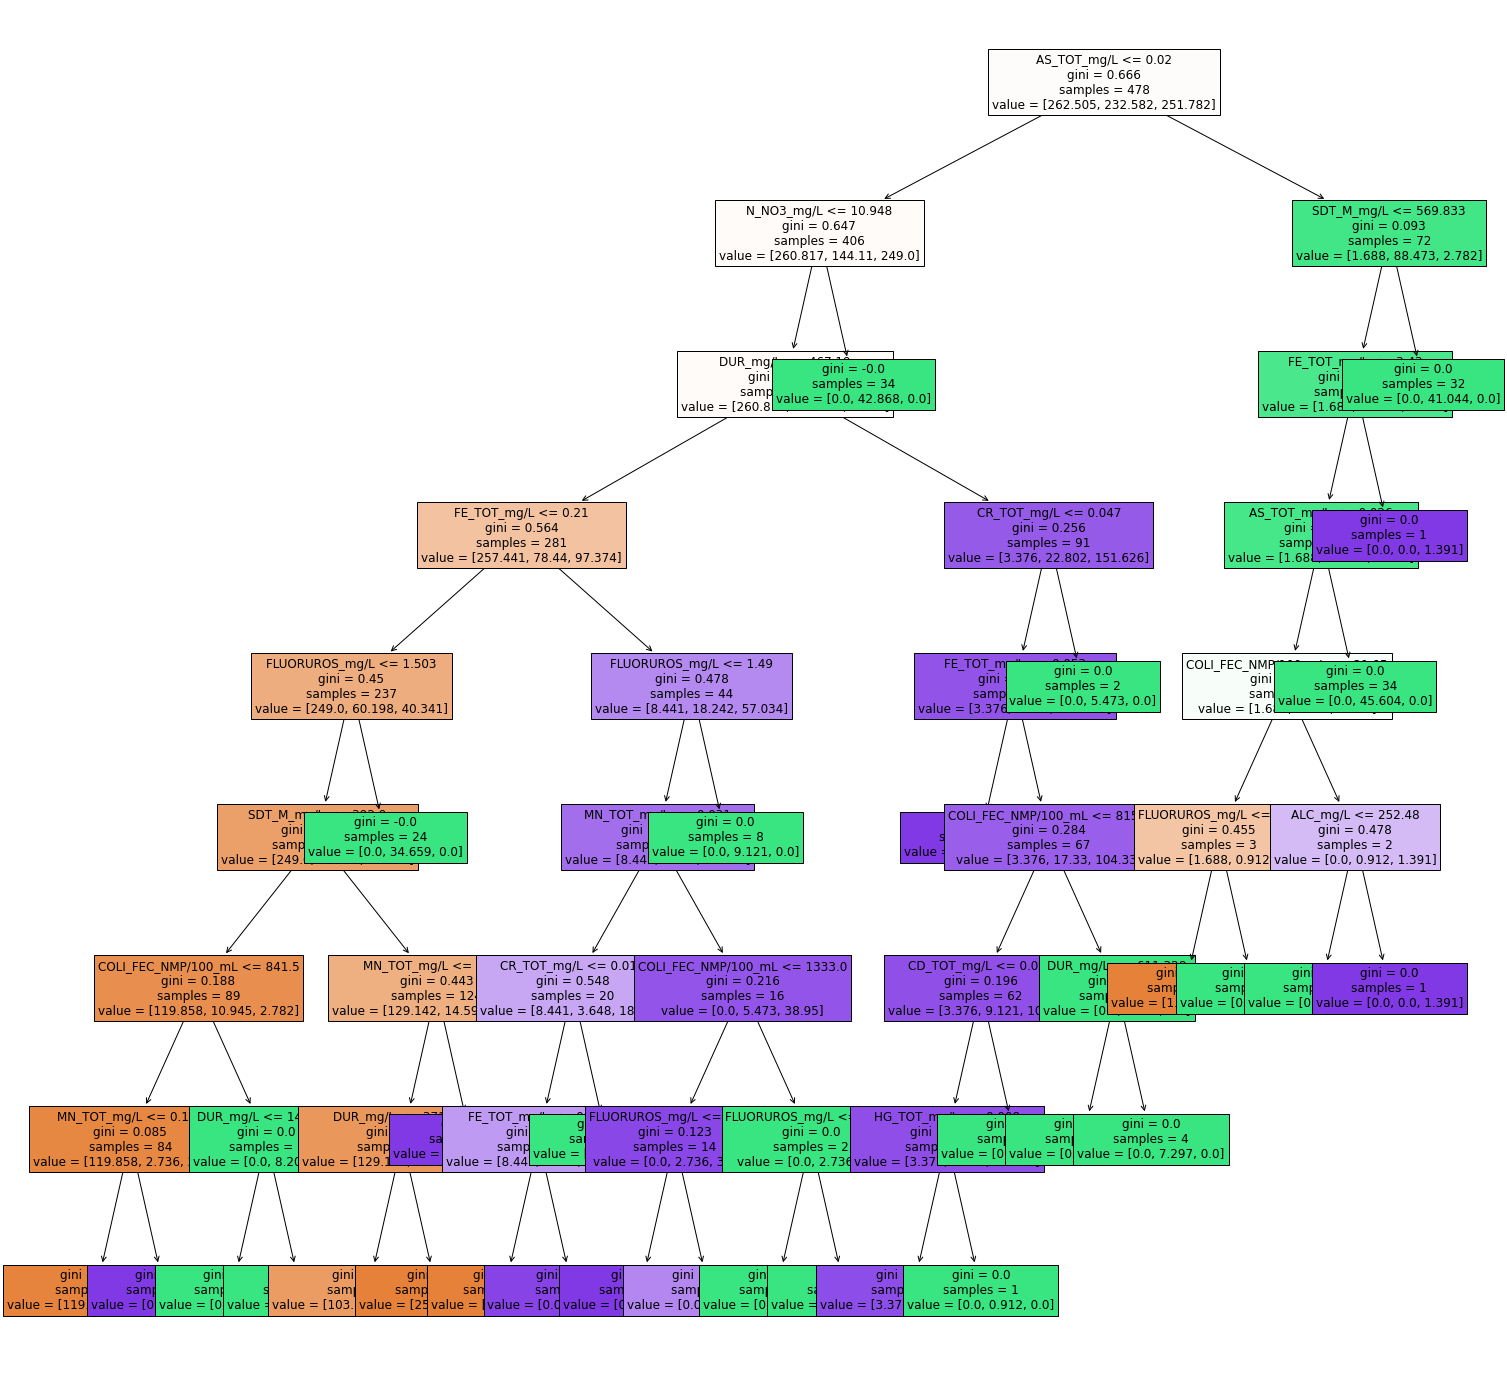

In [22]:
# graficamos el forest (primer arbol solamente)
fig = plt.figure(figsize=(25,25))
_ = tree.plot_tree(forest[0], feature_names=nombrefeatures, filled=True, fontsize=12)

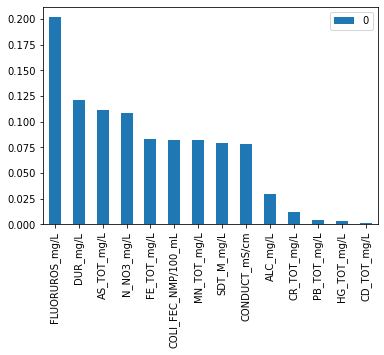

In [23]:
#revisamos la importancia de cada feacture
importanciaforest = pd.DataFrame(forest.feature_importances_,index=nombrefeatures).sort_values(by=0, ascending=False)
importanciaforest.plot(kind='bar')
#al igual que el arbol Floururos se lleva el 20% de importancia esta teniendo mas features secudarios casi con el mismo peso

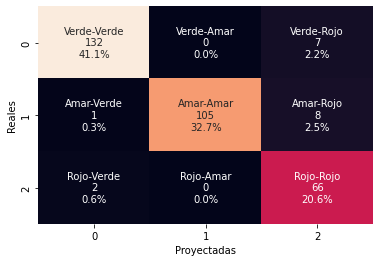

In [24]:
#matriz de confusion del forest
matrizforest = confusion_matrix(Y_test,prediccionesforest,labels=[1,2,3])
matrizforest
txt = ['Verde-Verde','Verde-Amar','Verde-Rojo',
    'Amar-Verde','Amar-Amar','Amar-Rojo',
    'Rojo-Verde','Rojo-Amar','Rojo-Rojo',]
frecuencia = ["{0:0.0f}".format(value) for value in matrizforest.flatten()]
porcentaje = ["{0:.1%}".format(value) for value in matrizforest.flatten()/np.sum(matrizforest)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(txt,frecuencia,porcentaje)]
labels = np.asarray(labels).reshape(3,3)
labels
ax = sns.heatmap(matrizforest, annot=labels, fmt='', cbar=False)
ax.set(ylabel="Reales", xlabel="Proyectadas")
plt.show()

In [26]:
#Comparacion de los scores de ambos modelos

print("Accuracy del modelo de árbol de decisión :", accuracyarbol)
print("Accuracy del modelo de random forest :", accuracyforest)


Accuracy del modelo de árbol de decisión : 0.956386292834891
Accuracy del modelo de random forest : 0.9439252336448598


Ambos modelos toman

al feature FLUORUROS_mg/L con una importancia del 20%

el feature DUR_mg/L queda en ambos en segundo pero en el árbol con más de un 16.7% y en forest con un 13.3

una columna con cambio importante de importancia es la de COLI_FEC_NMP/100_mL la cual en el árbol tiene un 12.3 de importancias siendo esta la 4ta posición y en el forest tiene un 7.4% pasando al 8vo lugar


